# Sales Anlysis

#### Import Necessary Libraries 

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

##### merging 12 months of data into a single table 

In [44]:
files = [file for file in os.listdir('/users/musabbelahouel/documents/python_data_analysis/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('/users/musabbelahouel/documents/python_data_analysis/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index = False)

#### Read in updated data frame

In [49]:
all_data = pd.read_csv('/users/musabbelahouel/documents/python_data_analysis/all_data.csv', index_col = 'Order ID')

In [50]:
all_data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,,,,,
295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [51]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 295665 to 222909
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Product           186305 non-null  object
 1   Quantity Ordered  186305 non-null  object
 2   Price Each        186305 non-null  object
 3   Order Date        186305 non-null  object
 4   Purchase Address  186305 non-null  object
dtypes: object(5)
memory usage: 8.6+ MB


##### Augment Data with additional columns

#### Add month column

In [85]:
all_data['Month'] = all_data['Month'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
Order ID,,,,,,
295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


##### Clean up the data

##### Drop rows with NaN's

In [80]:
null_df = all_data[all_data.isna().any(axis=1)]
null_df.head()

all_data = all_data.dropna(how = 'all')
all_data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
Order ID,,,,,,
295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


##### Find 'Or' and delete it 

In [84]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
Order ID,,,,,,
295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


###### Add a sales column

In [91]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head(20)

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
Order ID,,,,,,,
295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95
295670,AA Batteries (4-pack),1,3.84,12/31/19 22:58,"200 Jefferson St, New York City, NY 10001",12,3.84
295671,USB-C Charging Cable,1,11.95,12/16/19 15:10,"928 12th St, Portland, OR 97035",12,11.95
295672,USB-C Charging Cable,2,11.95,12/13/19 09:29,"813 Hickory St, Dallas, TX 75001",12,23.90
295673,Bose SoundSport Headphones,1,99.99,12/15/19 23:26,"718 Wilson St, Dallas, TX 75001",12,99.99


##### Convert quantity ordered and price each from str to the correct data type

In [88]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) 

###### What was the best month for sales and how much money was made during that month?

In [94]:
results = all_data.groupby('Month').sum()
results.head(13)

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


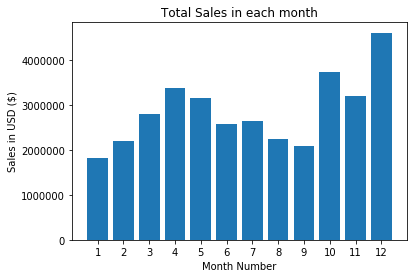

In [103]:
months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.xlabel('Month Number')
plt.ylabel('Sales in USD ($)')
plt.title('Total Sales in each month')
plt.show()

###### Maybe, this is because Chrismas is in December. Ther will probably be quite a few factors contributing towards why december is the month with the highest sales. So, quite a few hypothesis could be established from studying this graph.

##### Question 2: What US city had the highest number of sales?

##### Drop city code column 

In [129]:
all_data = all_data.drop(['City Code'])

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State Code
Order ID,,,,,,,,
295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,NY
295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,NY
295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,NY
295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,CA
295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,GA


##### Make a state column 

In [126]:
all_data['State Code'] = all_data['Purchase Address'].str[-8:-6]
all_data.head(100)

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City Code,State Code
Order ID,,,,,,,,,
295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,NY,NY
295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,NY,NY
295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,NY,NY
295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,CA,CA
295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,GA,GA
...,...,...,...,...,...,...,...,...,...
295751,AAA Batteries (4-pack),1,2.99,12/29/19 11:03,"922 Hickory St, Los Angeles, CA 90001",12,2.99,CA,CA
295752,Google Phone,1,600.00,12/11/19 12:29,"341 Forest St, Dallas, TX 75001",12,600.00,TX,TX
295753,34in Ultrawide Monitor,1,379.99,12/25/19 06:26,"365 Washington St, Dallas, TX 75001",12,379.99,TX,TX


In [130]:
state = all_data.groupby('State Code').sum()
state.head(13)

,Quantity Ordered,Price Each,Month,Sales
State Code,,,,
CA,83528,1.363290e+07,523845,1.371477e+07
GA,16602,2.779908e+06,104794,2.795499e+06
MA,22528,3.637410e+06,141112,3.661642e+06
ME,2750,4.471893e+05,17144,4.497583e+05
NY,27932,4.635371e+06,175741,4.664317e+06
OR,11303,1.860558e+06,70621,1.870732e+06
TX,27883,4.562501e+06,174449,4.587557e+06
WA,16553,2.733296e+06,104941,2.747755e+06


##### Make a city name column

In [140]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x)+')')
all_data.head(100)

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State Code,City
Order ID,,,,,,,,,
295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,NY,New York City (NY)
295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,NY,New York City (NY)
295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,NY,New York City (NY)
295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,CA,San Francisco (CA)
295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,GA,Atlanta (GA)
...,...,...,...,...,...,...,...,...,...
295751,AAA Batteries (4-pack),1,2.99,12/29/19 11:03,"922 Hickory St, Los Angeles, CA 90001",12,2.99,CA,Los Angeles (CA)
295752,Google Phone,1,600.00,12/11/19 12:29,"341 Forest St, Dallas, TX 75001",12,600.00,TX,Dallas (TX)
295753,34in Ultrawide Monitor,1,379.99,12/25/19 06:26,"365 Washington St, Dallas, TX 75001",12,379.99,TX,Dallas (TX)


##### Using f string to simplify the operation 

In [142]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()
                                                    

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State Code,City
Order ID,,,,,,,,,
295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,NY,New York City (NY)
295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,NY,New York City (NY)
295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,NY,New York City (NY)
295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,CA,San Francisco (CA)
295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,GA,Atlanta (GA)


##### This is the simple method

In [134]:
# all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
# all_data.head(100)

In [147]:
all_data.drop(['State Code'], axis = 1, inplace = True)

In [148]:
all_data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
Order ID,,,,,,,,
295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


In [151]:
city = all_data.groupby('City').sum().reset_index()
city.head(20)

,City,Quantity Ordered,Price Each,Month,Sales
0,Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
1,Austin (TX),11153,1.809874e+06,69829,1.819582e+06
2,Boston (MA),22528,3.637410e+06,141112,3.661642e+06
3,Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
4,Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
5,New York City (NY),27932,4.635371e+06,175741,4.664317e+06
6,Portland (ME),2750,4.471893e+05,17144,4.497583e+05
7,Portland (OR),11303,1.860558e+06,70621,1.870732e+06
8,San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06
9,Seattle (WA),16553,2.733296e+06,104941,2.747755e+06


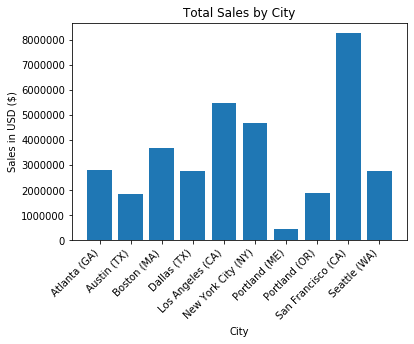

In [159]:
plt.bar(city['City'], city['Sales'])
plt.xlabel('City')
plt.ylabel('Sales in USD ($)')
plt.xticks(rotation=45, ha='right')
plt.title('Total Sales by City')
plt.show()

###### Maybe, San Fransisco is the city with the highest sales because; silicon valley needs more electronics, tech to advertise is better, people are richer etc. We could start to for some sort of hypothesis based on this graph.

###### Maybe, Portland has the lowest sales because; its the smallest city or advertising is the poorest.

##### What time should we display advertisments to maximise the likelyhood of customers buying products?

In [161]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [165]:
all_data['Hour'] = (all_data['Order Date']).dt.hour
all_data['Minute'] = (all_data['Order Date']).dt.minute
all_data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
Order ID,,,,,,,,,,
295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


In [183]:
hour = all_data.groupby(['Hour']).count()
hour.reset_index(inplace = True)

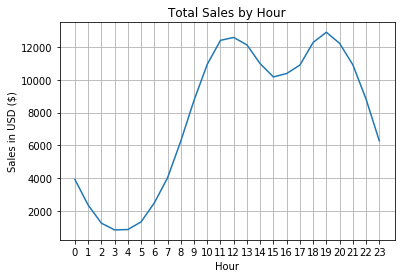

In [191]:
#plt.bar(hour['Hour'], hour['Sales'])
plt.plot(hour['Hour'], hour['Sales'])
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Sales in USD ($)')
plt.xticks(hour['Hour'])
plt.title('Total Sales by Hour')
plt.show()

In [192]:
# based on this chart my recommendation would be to advertise before 11am or 7pm, 
# because thats where the peaks are.
# This is the outcome for every city. It will be worth working out what time is best 
# for each city. 

##### What products are most often sold together?

In [198]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston (MA),12,37
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston (MA),12,37
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston (MA),12,37
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston (MA),12,37
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City (NY),14,32


In [200]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston (MA),12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City (NY),14,32,"Vareebadd Phone,USB-C Charging Cable"


In [203]:
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head(100)

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
...,...,...
2287,297847,"iPhone,Lightning Charging Cable"
2335,297894,"USB-C Charging Cable,AA Batteries (4-pack)"
2337,297895,"USB-C Charging Cable,27in FHD Monitor"
2388,297945,"Vareebadd Phone,USB-C Charging Cable,Bose Soun..."


In [205]:
# https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations 
from collections import Counter

In [206]:
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
# I could change the 2 value to 3 in order to get the 3 items most commonly bought together.

In [210]:
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [212]:
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


###### Which product sold the most? Why do you think it sold the most?

In [226]:
product_grouped = all_data.groupby('Product')
quantity_ordered = product_grouped['Product', 'Quantity Ordered'].sum().reset_index()

quantity_ordered.sort_values('Quantity Ordered', ascending=False)

/Users/musabbelahouel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
2,27in FHD Monitor,7550
18,iPhone,6849
1,27in 4K Gaming Monitor,6244


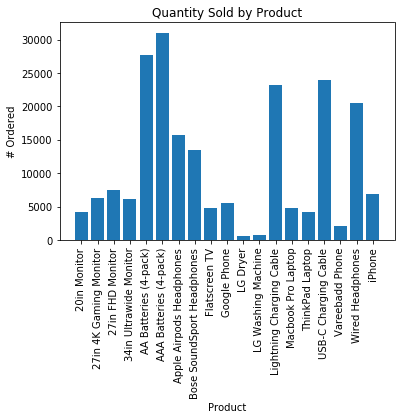

In [231]:
plt.bar(quantity_ordered['Product'], quantity_ordered['Quantity Ordered'])
plt.xlabel('Product')
plt.ylabel('# Ordered')
plt.xticks(rotation = 'vertical')
plt.title('Quantity Sold by Product')
plt.show()

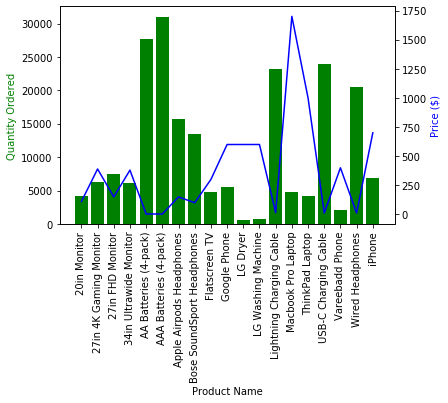

In [255]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(quantity_ordered['Product'], quantity_ordered['Quantity Ordered'], color='g')
ax2.plot(quantity_ordered['Product'], prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(quantity_ordered['Product'], rotation='vertical')
plt.show()